In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
def generate_matrix_by_metrics(metric,pathsArr,target):
    metric_scores=[]
#     print("metrics to be returned:",metric)
    for path in pathsArr:
#         print(path)
        df=pd.read_csv(path)
#         print(df.info())
#         df.info()
#         assert(type(df[metric])=='object',"check for the metric datatype")
        if('Features' in df.columns and '#Features' in df.columns):
#             print('inside if')
            df=df.drop(['Features','#Features'],axis=1)
        df = df[df['Algorithm']!='Linear Regression SGD']
#         df = df[df['Algorithm']!='MARS']
#         print(df.Algorithm.unique())
        values = df[df['Target']==target].sort_values(by='Algorithm')[metric].values
#         print(type(values))
#         print(values)
        metric_scores.append(values)
#         print(metric_scores)
    del df
#     print('*'*100)
    
#     metric_scores = np.concatenate( metric_scores, axis=0 )
#     print(np.asarray(metric_scores).reshape(14,6))
#     print(type(metric_scores))
    return np.round(metric_scores,2)
    
#     print(type(np.asarray(metric_scores)))
#     return np.asarray(metric_scores)

In [3]:
'''TODO: Generate a function which will return the plot for every axes passed'''
def generate_heatmap_forall(pathsArr,target,methods,models):
    r2_val=generate_matrix_by_metrics('R2(Validation)',pathsArr,target)
    r2_train=generate_matrix_by_metrics('R2(Train)',pathsArr,target)
    r2_test = generate_matrix_by_metrics('R2(Test)',pathsArr,target)
    rmse_val = generate_matrix_by_metrics('RMSE(Validation)',pathsArr,target)
    adjusted_r2= generate_matrix_by_metrics('Adjusted R2(Validation)',pathsArr,target)
    predictions = generate_matrix_by_metrics('R2(Test)',pathsArr,target)
    mae_val = generate_matrix_by_metrics('MAE(Validation)',pathsArr,target)
    std_val = generate_matrix_by_metrics('StandardError(Validation)',pathsArr,target)
#     aic_val= generate_matrix_by_metrics('AIC(Validation)',pathsArr,target)
#     mape_val= generate_matrix_by_metrics('MAPE(Validation)',pathsArr,target)
    

    '''Visualization for the different metrics'''

    import numpy as np
    import matplotlib
    import matplotlib.pyplot as plt
    i=0
    j=0

    '''TODO: Write a function to efficiently create the matrix'''
    fig,axes = plt.subplots(2,3,figsize=(30,27))
    
#     Plotting RMSE
    im = axes[0][0].imshow(rmse_val,cmap="RdBu_r",vmin=1, vmax=1.5)
    axes[0][0].set_xticks(np.arange(len(models)))
    axes[0][0].set_yticks(np.arange(len(methods)))
    axes[0][0].set_xticklabels(models)
    axes[0][0].set_yticklabels(methods)
    fig.colorbar(im , ax=axes[0][0])
    # axes[0][0].clim(-1, 1)
    # Rotate the tick labels and set their alignment.
    plt.setp(axes[0][0].get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor", weight='bold',fontsize=12)
    # Loop over data dimensions and create text annotations.
    for i in range(len(methods)):
        for j in range(len(models)):
            text = axes[0][0].text(j, i, rmse_val[i, j],
                           ha="center", va="center", color="black",weight='bold')
    axes[0][0].set_title("Root Mean Squared Error(RMSE)",weight='bold',fontsize=15)
    
#     # Plotting MAE
    im = axes[0][1].imshow(mae_val,cmap="RdBu_r",vmin=0.8, vmax=1.2)
    axes[0][1].set_xticks(np.arange(len(models)))
    axes[0][1].set_yticks(np.arange(len(methods)))
    # ... and label them with the respective list entries
    axes[0][1].set_xticklabels(models)
    axes[0][1].set_yticklabels(methods)
    fig.colorbar(im , ax=axes[0][1])
    # Rotate the tick labels and set their alignment.
    plt.setp(axes[0][1].get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor",weight='bold',fontsize=12)
    # Loop over data dimensions and create text annotations.
    for i in range(len(methods)):
        for j in range(len(models)):
            text = axes[0][1].text(j, i, mae_val[i, j],
                           ha="center", va="center", color="black",weight='bold')
    axes[0][1].set_title("Mean Absolute Error(MAE)",weight='bold',fontsize=15)
    
     # plotting the MAPE
    
#     im = axes[2].imshow(mape_val,cmap="RdBu_r")
#     axes[2].set_xticks(np.arange(len(models)))
#     axes[2].set_yticks(np.arange(len(methods)))
#     axes[2].set_xticklabels(models)
#     axes[2].set_yticklabels(methods)
#     fig.colorbar(im , ax=axes[2])
#     plt.setp(axes[2].get_xticklabels(), rotation=45, ha="right",
#              rotation_mode="anchor")
#     for i in range(len(methods)):
#         for j in range(len(models)):
#             text = axes[2].text(j, i, mape_val[i, j],
#                            ha="center", va="center", color="black")
#     axes[2].set_title("Mean Absolute Percentage Error(MAPE)")

    
    # Plotting Adjusted R2
#     i=0
#     j=0
    im = axes[0][2].imshow(adjusted_r2,cmap="RdBu_r",vmin=0, vmax=.6)
    axes[0][2].set_xticks(np.arange(len(models)))
    axes[0][2].set_yticks(np.arange(len(methods)))
    # ... and label them with the respective list entries
    axes[0][2].set_xticklabels(models)
    axes[0][2].set_yticklabels(methods)
    fig.colorbar(im , ax=axes[0][2])
    # Rotate the tick labels and set their alignment.
    plt.setp(axes[0][2].get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor",weight='bold',fontsize=12)
    # Loop over data dimensions and create text annotations.
    for i in range(len(methods)):
        for j in range(len(models)):
            text = axes[0][2].text(j, i, adjusted_r2[i, j],
                           ha="center", va="center", color="black",weight='bold')
    axes[0][2].set_title("Adjusted-$R^2$",weight='bold',fontsize=15)


    # Plotting R2 for train
    im = axes[1][0].imshow(r2_val,cmap="RdBu_r",vmin=0, vmax=.60)
    axes[1][0].set_xticks(np.arange(len(models)))
    axes[1][0].set_yticks(np.arange(len(methods)))
    # ... and label them with the respective list entries
    axes[1][0].set_xticklabels(models)
    axes[1][0].set_yticklabels(methods)
    fig.colorbar(im , ax=axes[1][0])
    # Rotate the tick labels and set their alignment.
    plt.setp(axes[1][0].get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor",weight='bold',fontsize=12)
    # Loop over data dimensions and create text annotations.
    for i in range(len(methods)):
        for j in range(len(models)):
            text = axes[1][0].text(j, i, '{}\n(+/-{})'.format(r2_val[i, j],std_val[i, j]),
                           ha="center", va="center", color="black",weight='bold')
    axes[1][0].set_title("Mean Cross validation scores $(R^2)$ of training data",weight='bold',fontsize=15)
    
    
    # Plotting R2 for test
    im = axes[1][1].imshow(r2_test,cmap="RdBu_r",vmin=0, vmax=.60)
    axes[1][1].set_xticks(np.arange(len(models)))
    axes[1][1].set_yticks(np.arange(len(methods)))
    # ... and label them with the respective list entries
    axes[1][1].set_xticklabels(models)
    axes[1][1].set_yticklabels(methods)
    fig.colorbar(im , ax=axes[1][1])
    # Rotate the tick labels and set their alignment.
    plt.setp(axes[1][1].get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor",weight='bold',fontsize=12)
    # Loop over data dimensions and create text annotations.
    for i in range(len(methods)):
        for j in range(len(models)):
            text = axes[1][1].text(j, i, '{}'.format(r2_test[i, j]),
                           ha="center", va="center", color="black",weight='bold')
    axes[1][1].set_title("Generalization scores $(R^2)$ on test data",weight='bold',fontsize=15)
    
    
    axes[1][2].remove()
    plt.setp(axes[0][0].get_yticklabels(), ha="right",
             rotation_mode="anchor",weight='bold',fontsize=12)
    plt.setp(axes[1][0].get_yticklabels(), ha="right",
             rotation_mode="anchor",weight='bold',fontsize=12)
    fig.tight_layout()
    title='Comparison of different ML techniques for predicting '+target
#     fig.suptitle(title,y=1.1,fontsize=20, weight='bold')
    plt.show()

In [4]:
pathsArr=[
'PCA_alltargets_mahalanobis_0.95PC.csv',
    'PCA_alltargets_mahalanobis_0.80PC.csv',
    'PCA_alltargets_mahalanobis_3PC.csv',
        
    'feature_selection_mahalanobis_alltargets.csv',
    'feature_selection_mahalanobis_alltargets_PCA_0.95PC.csv',
         'feature_selection_mahalanobis_alltargets_PCA_0.80PC.csv',
    #'study1_feature_selection_mahalanobis_alltargets_PCA_3PC.csv',
    
    'PCA_alltargets_mahalanobis_transformed_0.95PC.csv',
    'PCA_alltargets_mahalanobis_transformed_0.80PC.csv',
         'PCA_alltargets_mahalanobis_transformed_3PC.csv',  
    
    'feature_selection_mahalanobis_transformed_alltargets.csv',
    'feature_selection_mahalanobis_transformed_alltargets_PCA_0.95PC.csv',
         'feature_selection_mahalanobis_transformed_alltargets_PCA_0.80PC.csv',
      #   'study1_feature_selection_mahalanobis_transformed_alltargets_PCA_3PC.csv'
]
# r2_val=generate_matrix_by_metrics('R2(Test)',pathsArr,'PQ')
# r2_val


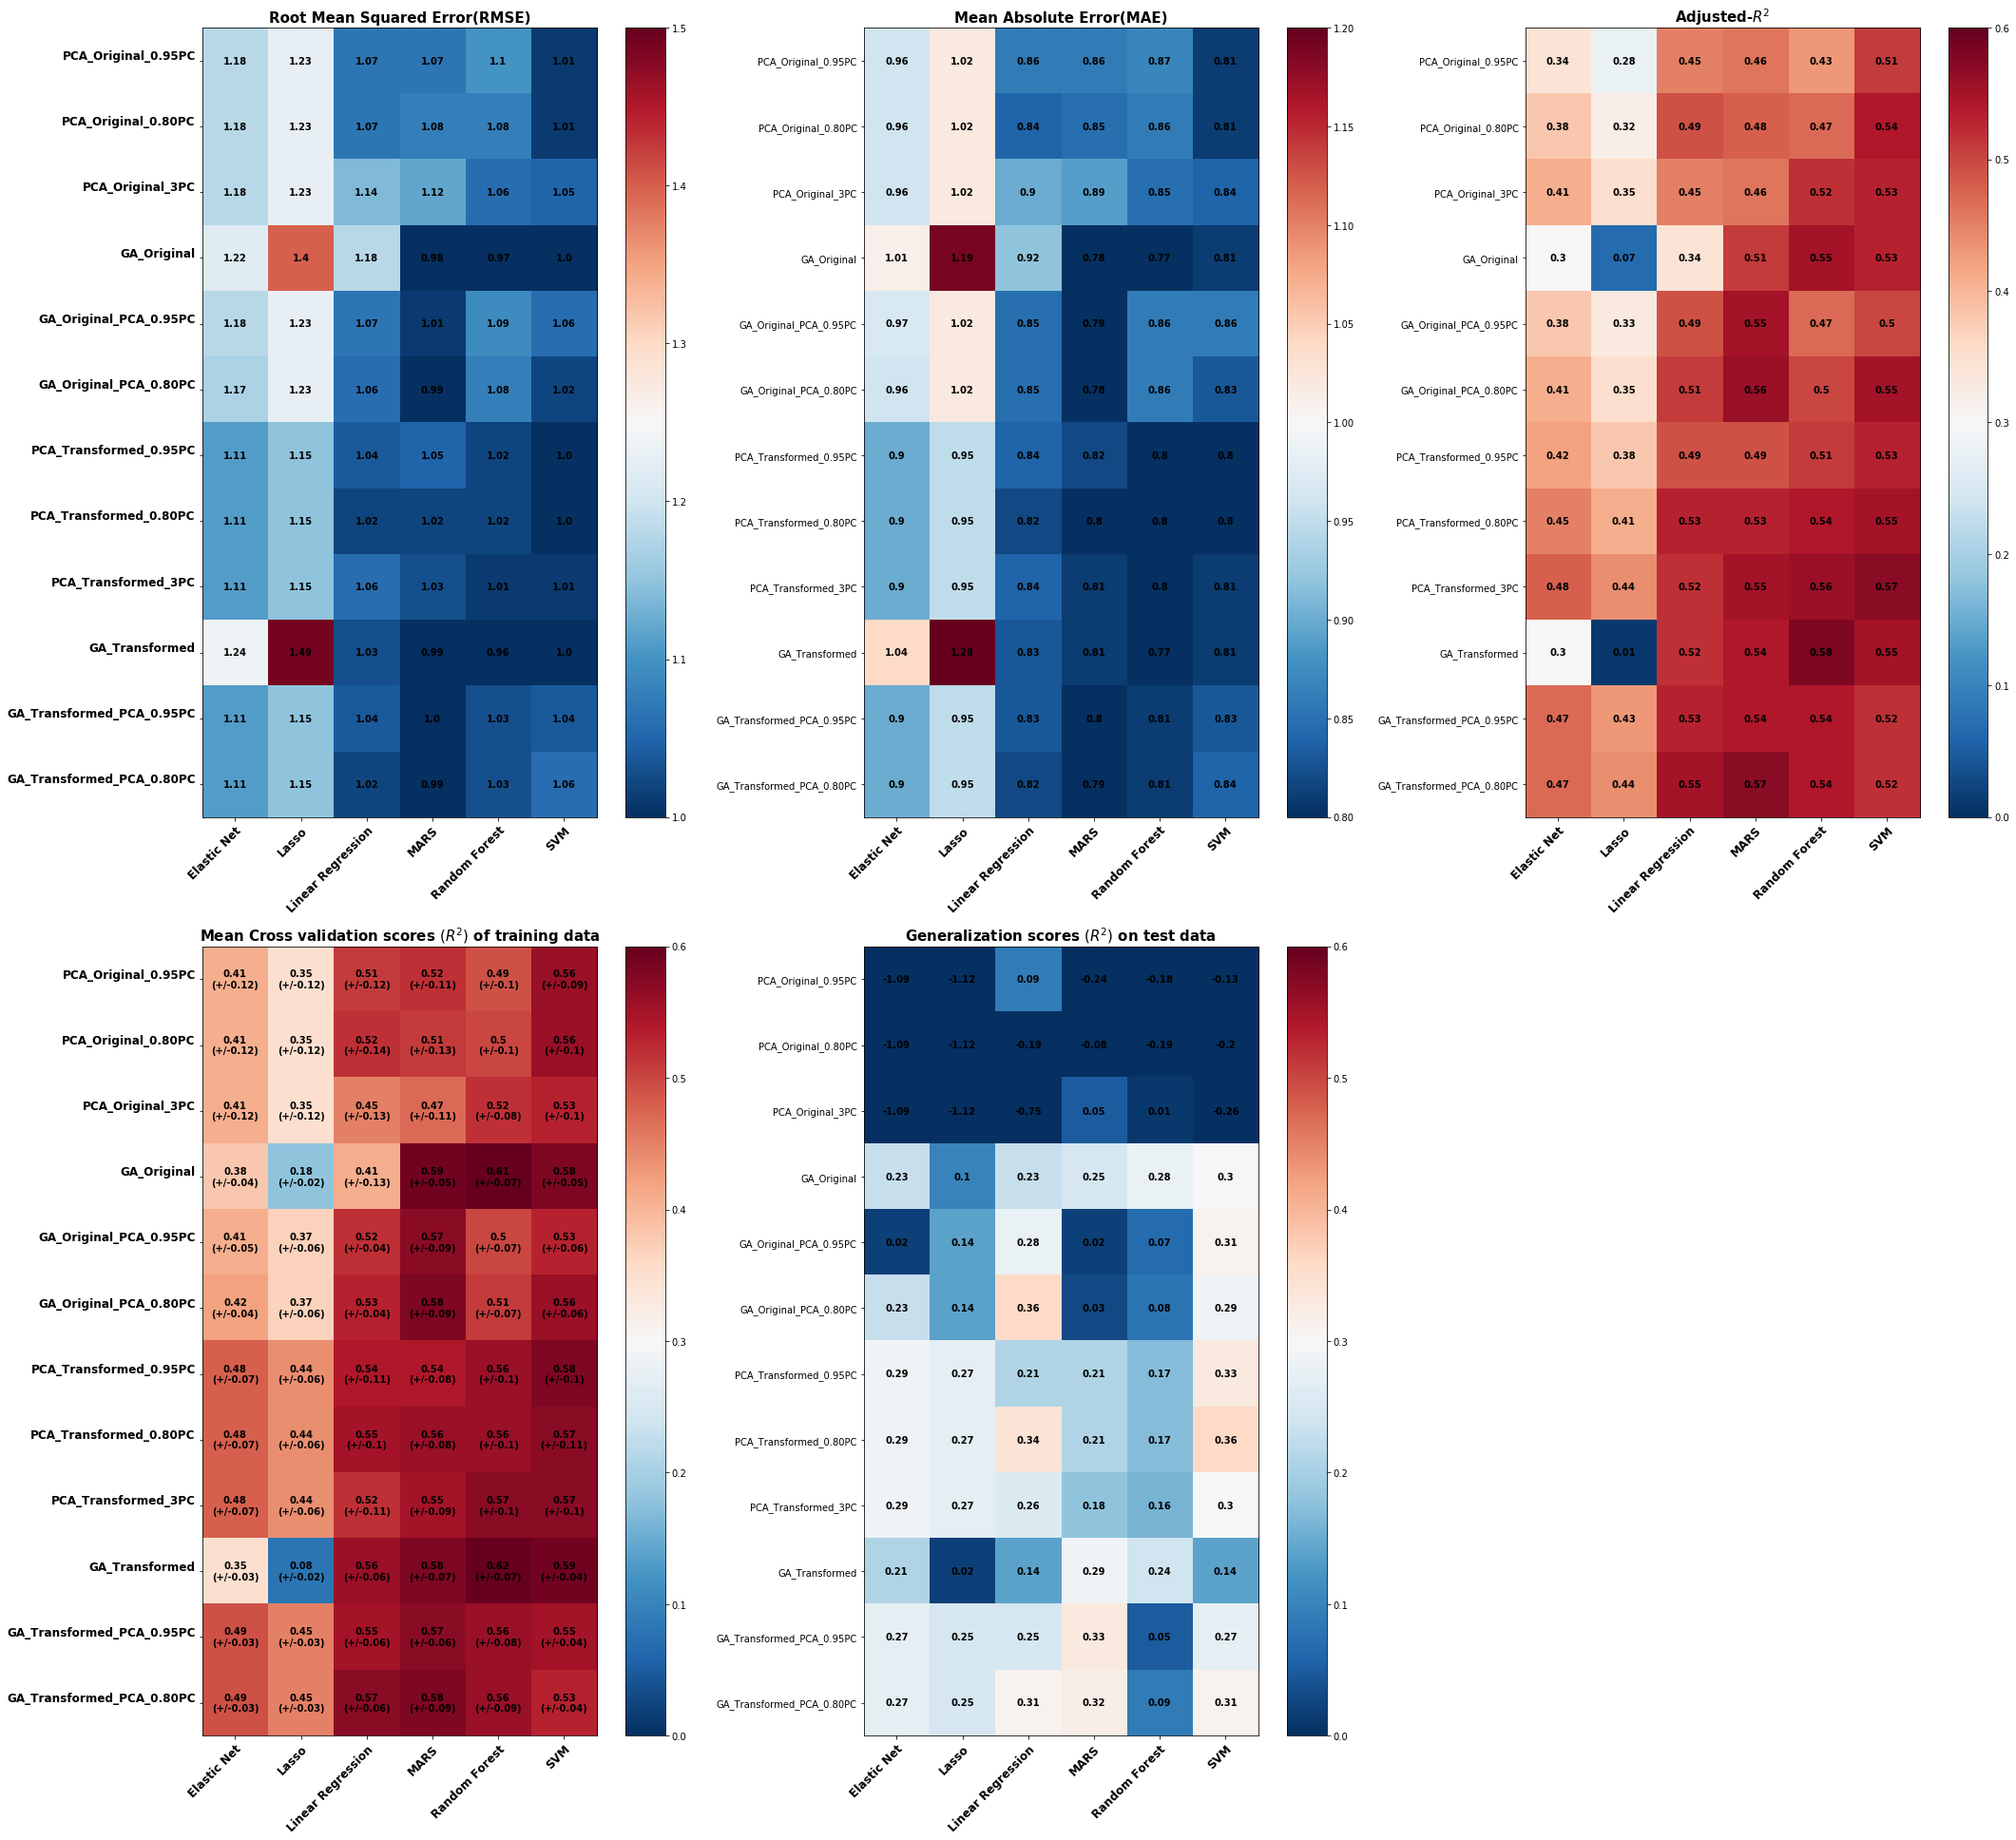

In [5]:
pathsArr=[
'PCA_alltargets_mahalanobis_0.95PC.csv',
    'PCA_alltargets_mahalanobis_0.80PC.csv',
    'PCA_alltargets_mahalanobis_3PC.csv',
        
    'feature_selection_mahalanobis_alltargets.csv',
    'feature_selection_mahalanobis_alltargets_PCA_0.95PC.csv',
         'feature_selection_mahalanobis_alltargets_PCA_0.80PC.csv',
    #'study1_feature_selection_mahalanobis_alltargets_PCA_3PC.csv',
    
    'PCA_alltargets_mahalanobis_transformed_0.95PC.csv',
    'PCA_alltargets_mahalanobis_transformed_0.80PC.csv',
         'PCA_alltargets_mahalanobis_transformed_3PC.csv',  
    
    'feature_selection_mahalanobis_transformed_alltargets.csv',
    'feature_selection_mahalanobis_transformed_alltargets_PCA_0.95PC.csv',
         'feature_selection_mahalanobis_transformed_alltargets_PCA_0.80PC.csv',
      #   'study1_feature_selection_mahalanobis_transformed_alltargets_PCA_3PC.csv'
]
methods = ["PCA_Original_0.95PC", "PCA_Original_0.80PC", "PCA_Original_3PC",
               
               "GA_Original","GA_Original_PCA_0.95PC",
              "GA_Original_PCA_0.80PC",
           #"GA_Original_PCA_3PC",
           
            "PCA_Transformed_0.95PC", "PCA_Transformed_0.80PC", "PCA_Transformed_3PC",
           
               "GA_Transformed","GA_Transformed_PCA_0.95PC","GA_Transformed_PCA_0.80PC",
              #"GA_Transformed_PCA_3PC"
              ]
models=['Elastic Net', 'Lasso', 'Linear Regression',
           'MARS',
           'Random Forest','SVM'
       ]

target='PQ'
generate_heatmap_forall(pathsArr,target,methods,models)


# target='ATT'
# generate_heatmap_forall(pathsArr,target,methods,models)

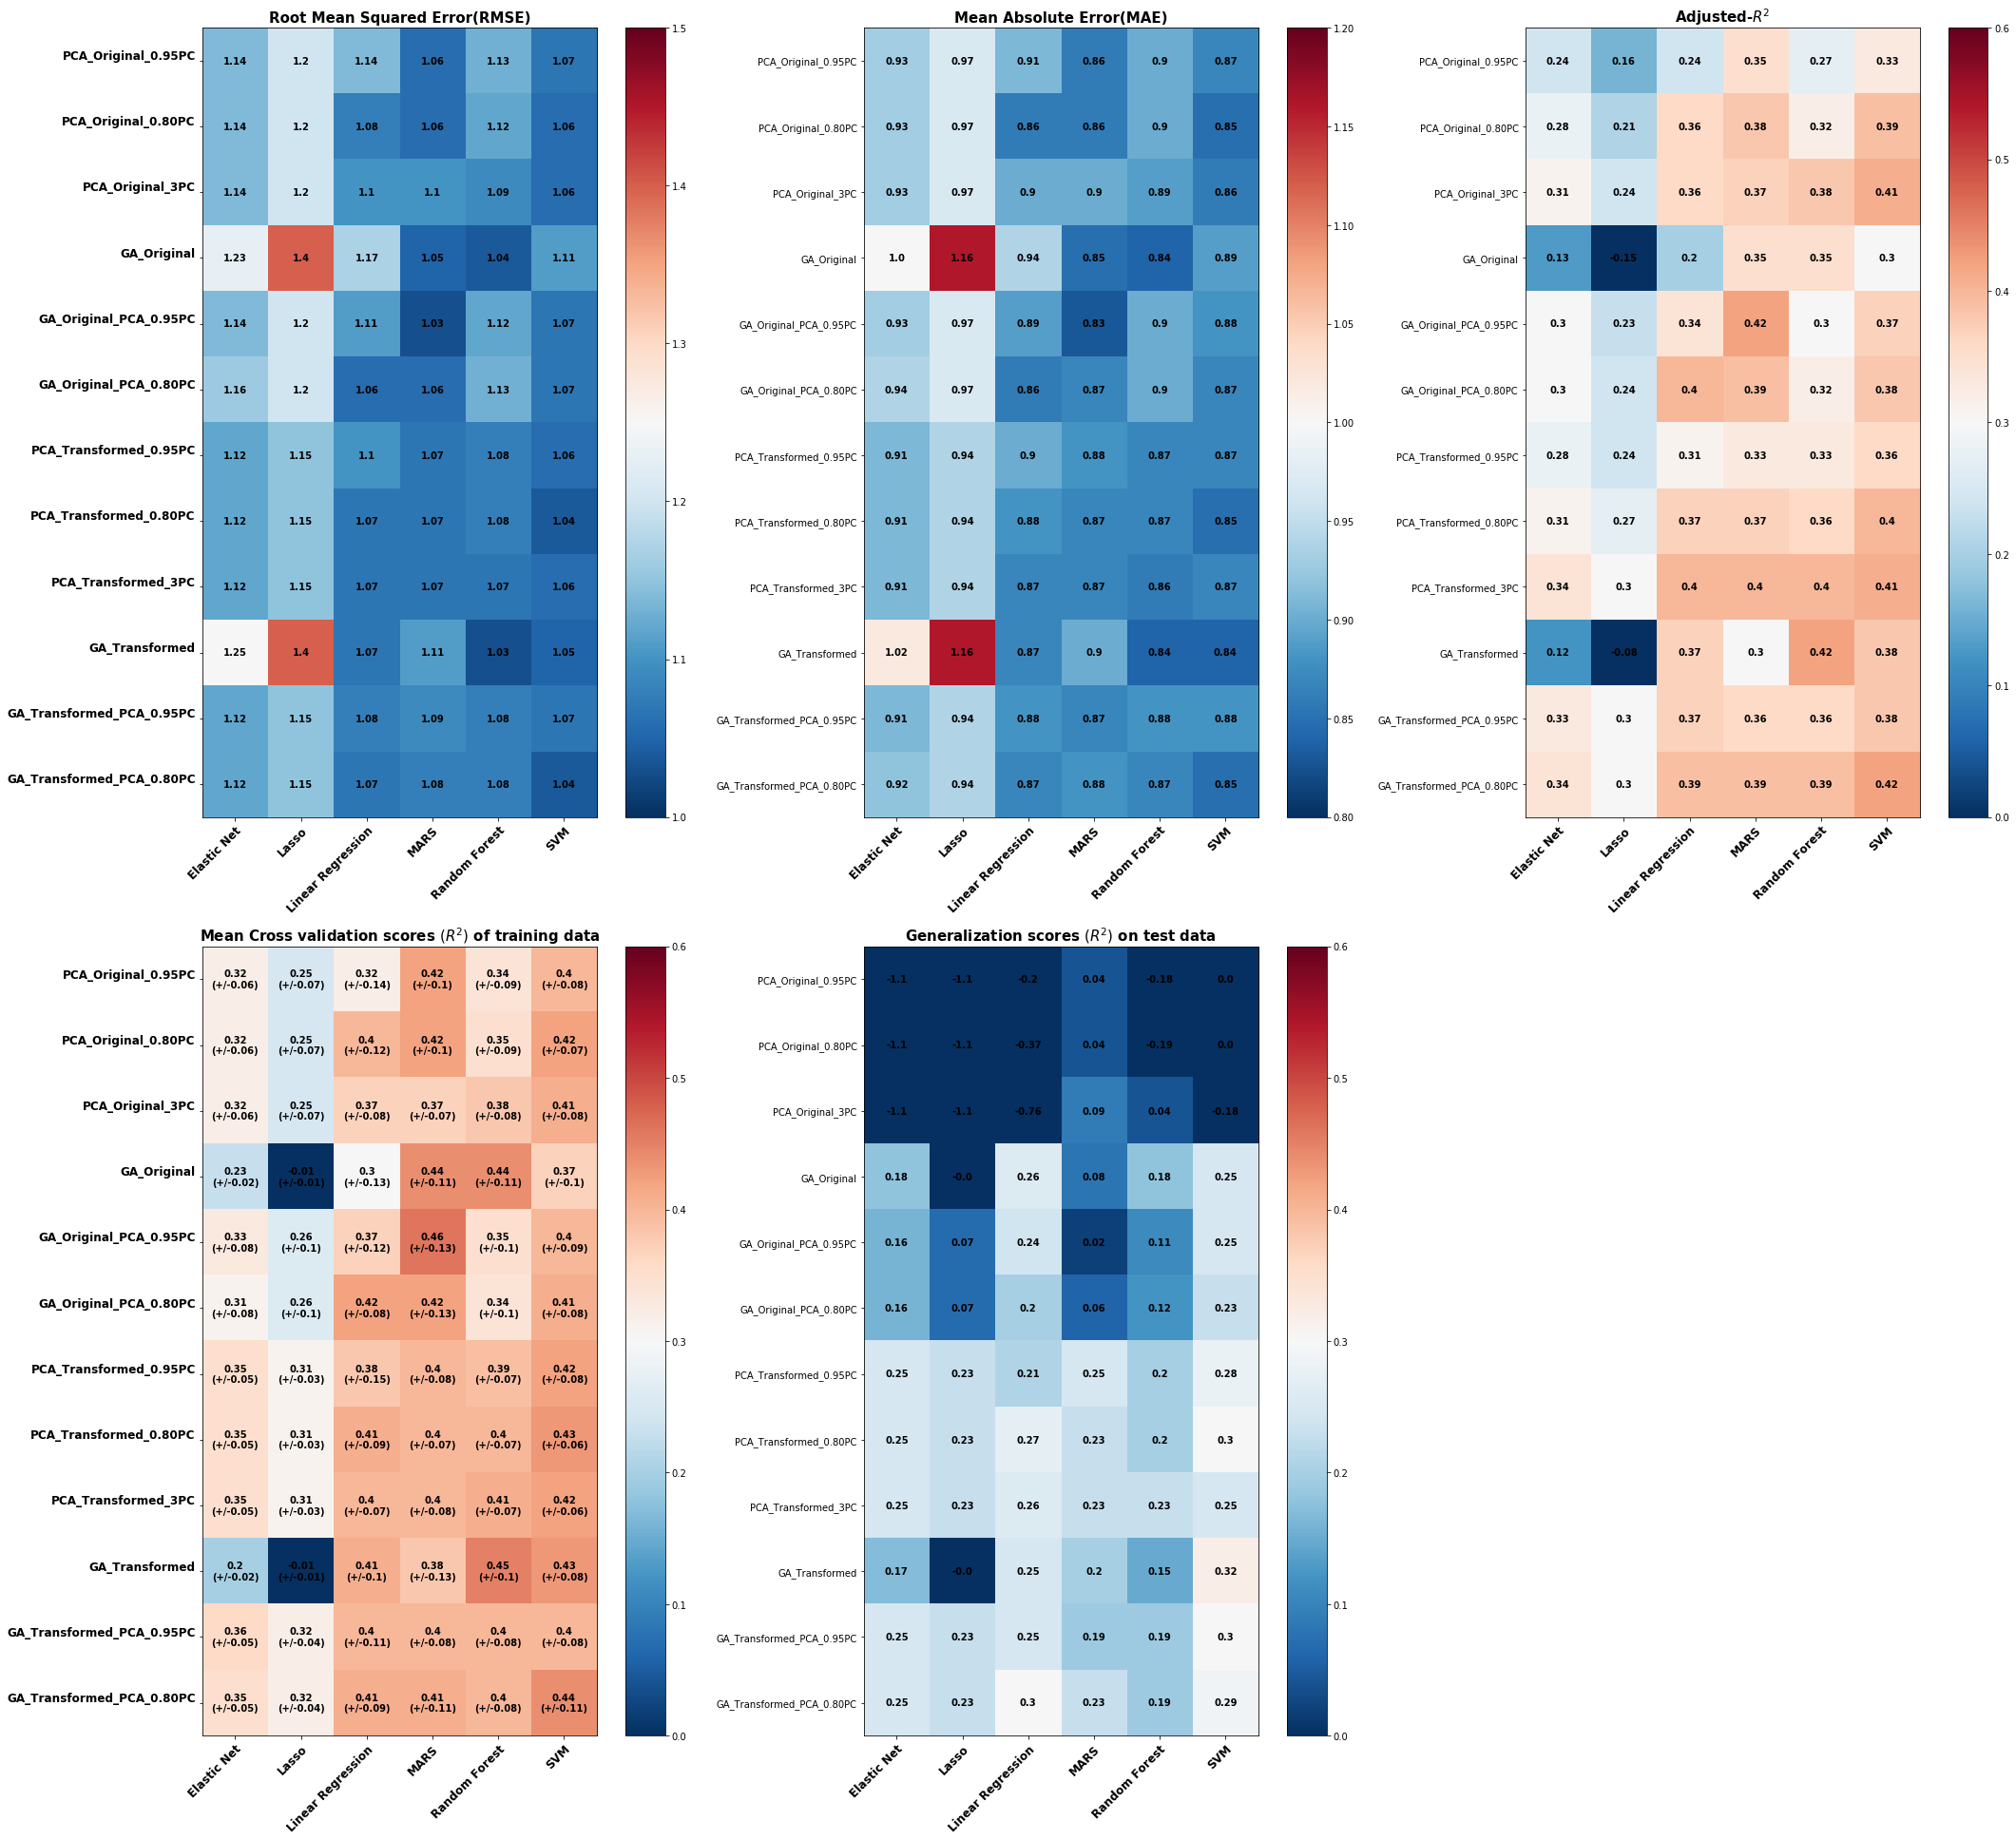

In [6]:
target='ATT'
generate_heatmap_forall(pathsArr,target,methods,models)